In [32]:
from math import *
def from1to6(A, B, C):
    D = [(A[0]+B[0])/2, (A[1]+B[1])/2, (A[2]+B[2])/2]
    E = [(B[0]+C[0])/2, (B[1]+C[1])/2, (B[2]+C[2])/2]
    F = [(A[0]+C[0])/2, (A[1]+C[1])/2, (A[2]+C[2])/2]
    OC = [(D[0] + E[0] + F[0])/3, (D[1] + E[1] + F[1])/3, (D[2] + E[2] + F[2])/3]
    DE = [E[0]-D[0], E[1]-D[1], E[2]-D[2]]
    DF = [F[0]-D[0], F[1]-D[1], F[2]-D[2]]
    ort = [DF[1] * DE[2] - DF[2]*DE[1], DF[2]*DE[0] - DF[0]*DE[2], DF[0]*DE[1] - DF[1]*DE[0]]
    skal = sqrt(DE[0]**2 + DE[1]**2 + DE[2]**2)*sqrt(6)/sqrt(ort[0]**2 + ort[1]**2 + ort[2]**2)/3
    ort = [ort[0]*skal, ort[1]*skal, ort[2]*skal]
    G = [OC[0] + ort[0], OC[1] + ort[1], OC[2] + ort[2]]
    return [[A, D, F], [D, B, E], [F, E, C], [D, G, F], [E, G, D], [F, G, E]]
        
    

In [33]:
from1to6([0,0,0], [1/2, sqrt(3)/2, 0], [1, 0, 0])

[[[0, 0, 0], [0.25, 0.4330127018922193, 0.0], [0.5, 0.0, 0.0]],
 [[0.25, 0.4330127018922193, 0.0],
  [0.5, 0.8660254037844386, 0],
  [0.75, 0.4330127018922193, 0.0]],
 [[0.5, 0.0, 0.0], [0.75, 0.4330127018922193, 0.0], [1, 0, 0]],
 [[0.25, 0.4330127018922193, 0.0],
  [0.5, 0.28867513459481287, 0.40824829046386296],
  [0.5, 0.0, 0.0]],
 [[0.75, 0.4330127018922193, 0.0],
  [0.5, 0.28867513459481287, 0.40824829046386296],
  [0.25, 0.4330127018922193, 0.0]],
 [[0.5, 0.0, 0.0],
  [0.5, 0.28867513459481287, 0.40824829046386296],
  [0.75, 0.4330127018922193, 0.0]]]

In [46]:
def generate_Koch_surface(triangles, iterations):
    for i in range(iterations):
        real_index = 0
        for j in range(len(triangles)):
            sixnew = from1to6(triangles[real_index][0], triangles[real_index][1], triangles[real_index][2])
            del triangles[real_index]
            for new in sixnew:
                triangles.insert(real_index, new)
            real_index = real_index + 6
    return triangles
            

In [43]:
import plotly.graph_objects as go

def plotTriangle(triangles):
    fig = go.Figure()
    for triangle in triangles:
        
        x = [vertex[0] for vertex in triangle]
        y = [vertex[1] for vertex in triangle]
        z = [vertex[2] for vertex in triangle]
        
        fig.add_trace(go.Mesh3d(
            x=x,  
            y=y,  
            z=z,  
            color='cyan', 
            opacity=1,  
            i=[0],  
            j=[1],  
            k=[2],  
        ))
    fig.update_layout(
    scene=dict(
            xaxis=dict(title='X', range=[-0.2, 1.2]),  # Custom X-axis limits
            yaxis=dict(title='Y', range=[-0.2, 1.2]),  # Custom Y-axis limits
            zaxis=dict(title='Z', range=[-0.2, 1.2]),  # Custom Z-axis limits
            aspectmode='cube'  # Equal scale for all axes
        ),
    title="Koch's surface"
    )
    fig.show()

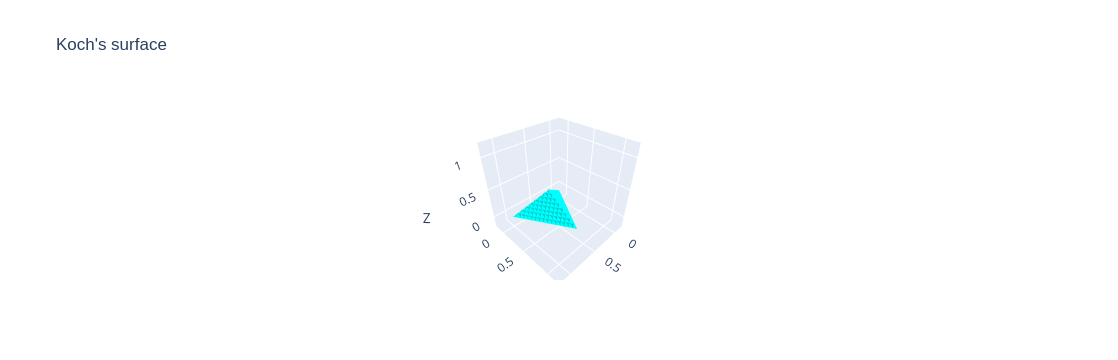

In [57]:
plotTriangle(generate_Koch_surface([[[0,0,0], [1/2, sqrt(3)/2, 0], [1, 0, 0]]], 4))

In [34]:
sqrt(3)/4

0.4330127018922193

TypeError: 'int' object is not subscriptable

In [52]:
x= [[[0,0,0], [1/2, sqrt(3)/2, 0], [1, 0, 0]]]


0